### **Model to predict the malignancy of cancer and its recuurence time**

**Importing Libraries**

In [ ]:
import numpy as np # linear algebra operations
import pandas as pd # data processing 
import seaborn as sns # data-visualization library 
import matplotlib.pyplot as plt #data plotting and visualizing libraries 

In [ ]:
dataset = pd.read_excel('BreastCancer_Prognostic_v1.xlsx')

In [ ]:
dataset.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [ ]:
print("Dimension of Dataset : {}".format(dataset.shape))

Dimension of Dataset : (198, 35)


**Naming the parametes**

In [ ]:
# y includes our labels and x includes our features
X = dataset.iloc[:, 3:34]
y = dataset.iloc[: , 1]              
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
0,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


Number of Non Recurrent:  151
Number of Recurrent :  47


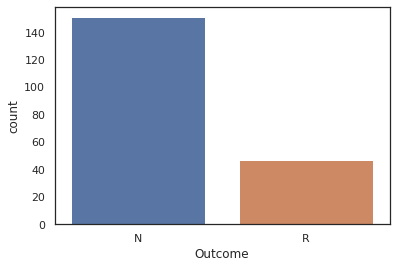

In [ ]:
Y = dataset.Outcome
ax = sns.countplot(Y,label="Count") 
N , R = Y.value_counts()
print('Number of Non Recurrent: ', N)
print('Number of Recurrent : ',R)

**Checking for Missing/Null Points**

In [ ]:
dataset.isnull().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

**Plotting the violin Plot**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

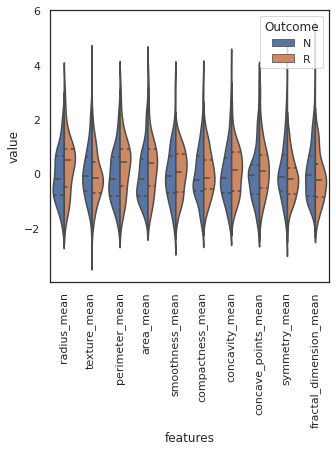

In [ ]:
data_dia = Y
data1 = X
data1 = data1.astype(float)
data_n_2 = (data1 - data1.mean())/data1.std()
data1 = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data1 = pd.melt(data1,id_vars="Outcome",var_name="features",value_name='value')
plt.figure(figsize=(5,5))
sns.violinplot(x="features", y="value", hue="Outcome", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

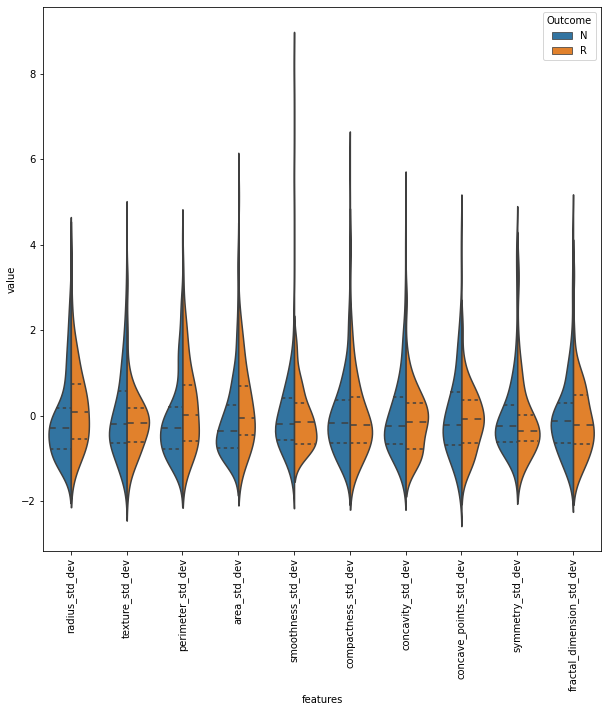

In [ ]:
data1 = pd.concat([Y,data_n_2.iloc[:,10:20]],axis=1)
data1 = pd.melt(data1,id_vars="Outcome",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

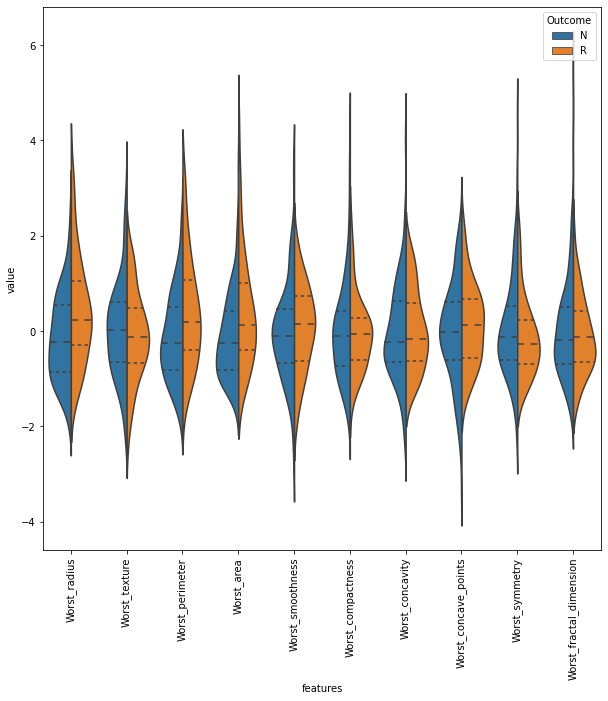

In [ ]:
data1 = pd.concat([Y,data_n_2.iloc[:,20:30]],axis=1)
data1 = pd.melt(data1,id_vars="Outcome",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)

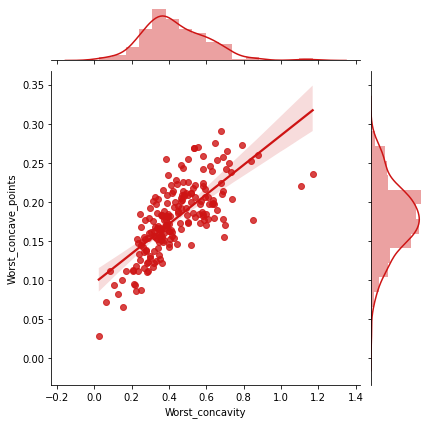

In [ ]:
sns.jointplot(X.loc[:,'Worst_concavity'], X.loc[:,'Worst_concave_points'], kind="regg", color="#ce1414")

**Plotting the grid plot**

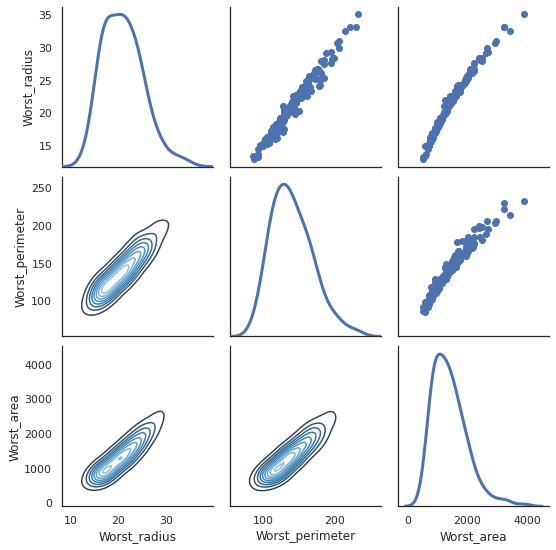

In [ ]:
sns.set(style="white")
df = X.loc[:,['Worst_radius','Worst_perimeter','Worst_area']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

**Plotting the head map and removing corelated features**

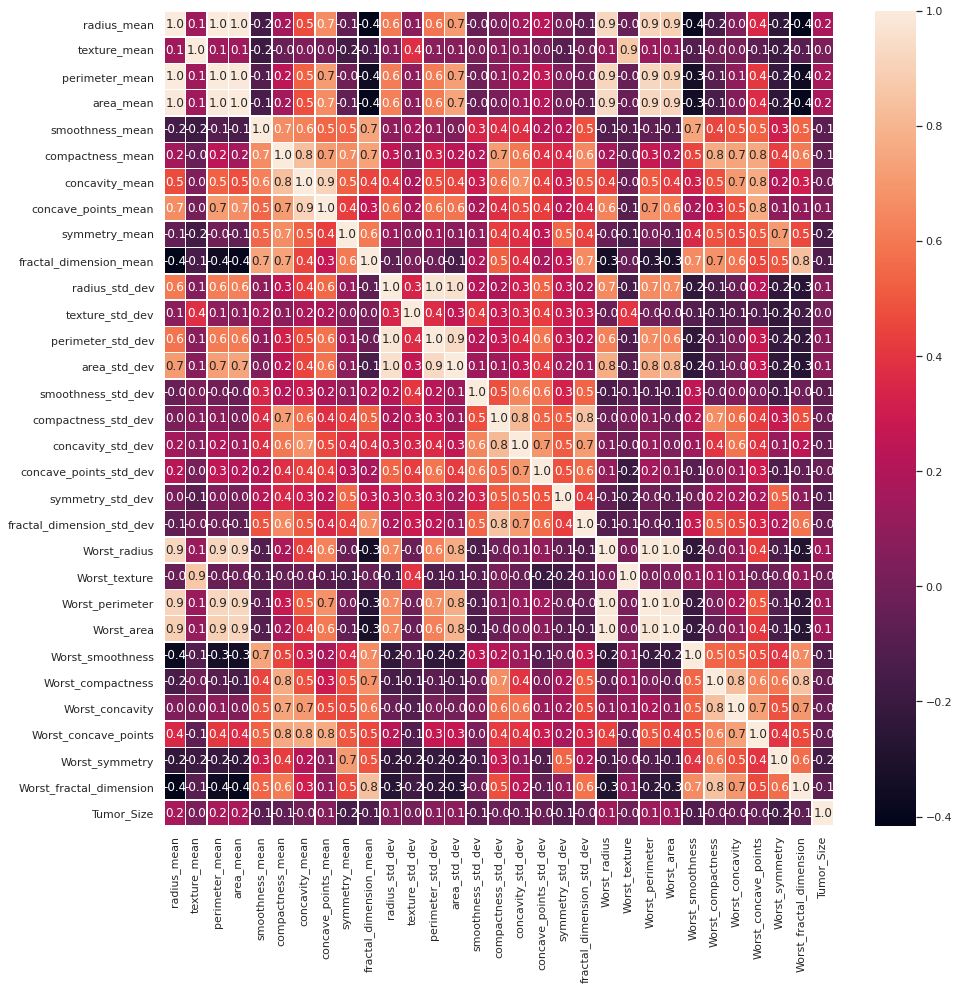

In [ ]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_std_dev','perimeter_std_dev','Worst_radius','Worst_perimeter','Worst_compactness','Worst_concave_points','compactness_std_dev','concave_points_std_dev','Worst_texture','Worst_area']
X_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_std_dev,area_std_dev,smoothness_std_dev,concavity_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_concavity,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
0,27.60,1013.0,0.09489,0.1086,0.1865,0.06333,1.8900,71.55,0.004433,0.03233,0.01694,0.003495,0.1195,0.3140,0.2677,0.08113,5.0
1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890,3.0
2,17.44,1373.0,0.08836,0.1255,0.2333,0.06010,0.6105,82.15,0.006167,0.03300,0.03094,0.005039,0.1188,0.3414,0.4334,0.09067,2.5
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300,2.0
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678,3.5


**Plotting the heat map after removing the corelated features**

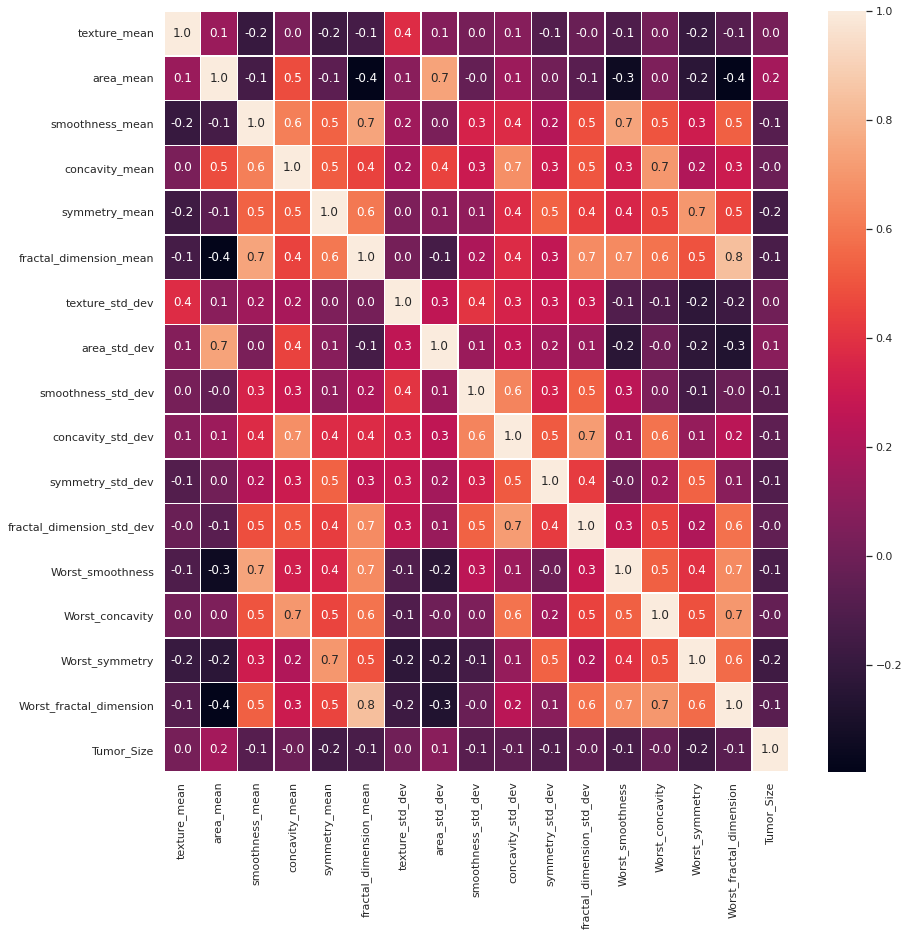

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Importing classifiers for our pre-processed data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

**Random Forest Classfier**

Accuracy is:  0.82


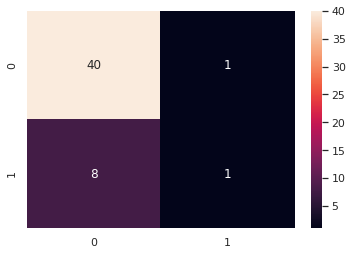

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

**Decision Tree Classifier**

Accuracy is:  0.96


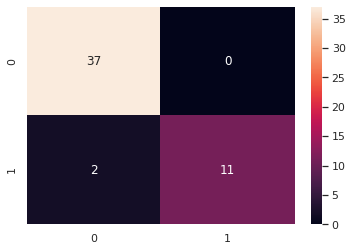

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=0)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
classifier.fit(x_train, y_train)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
y_prediction = clf_rf.predict(x_test)
y_prediction = pd.DataFrame(y_prediction)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
clf_rf.predict(x_test)
y_prediction.to_csv(r'C:\Users\Varna\Desktop\task-1.xls')

**XG Boost classifier**

Accuracy is:  0.96


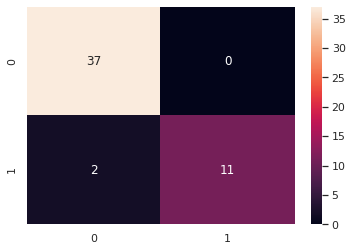

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=20)
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
classifier.fit(x_train, y_train)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

**SVM Classifier**

Accuracy is:  0.94


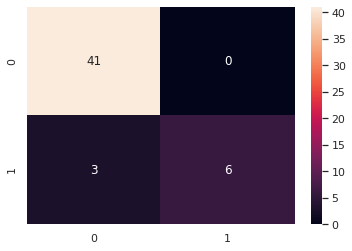

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=27)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier = SVC()
classifier.fit(x_train, y_train)
classifier.fit(x_train, y_train)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

### **Task 2 : Regression Model**

**Using Linear Regression Model**

In [ ]:
y_time = dataset.Time
y_time = pd.DataFrame(y_time)
X_regression = X_1[dataset.Outcome=='R']
y_regression = y_time[dataset.Outcome=='R']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_regression, y_regression, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
y_pred=pd.DataFrame(y_pred)
y_pred.to_csv(r'C:\Users\Varna\Desktop\task2.excel')

Mean Absolute Error: 20.956728034998417
Root Mean Squared Error: 24.05205257082855


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
regressor.fit(X_poly , Y_train)
y_pred = regressor.predict(X_poly_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 144.67131889186567
Root Mean Squared Error: 204.6698189726821


In [ ]:
y_pred.to_csv(r'C:\Users\Varna\Desktop\linear_reg.csv')